# 1. Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

# 2. SK HYNIX

In [2]:
data = pd.read_csv("./data/SKHYNIX.csv")
data = data[data.columns[2:-1]]

# 3. Date Setting

In [3]:
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")

# 4. Data head

In [4]:
data.head(10)

,open,high,low,close,trading_volume,trading_value
date,,,,,,
2017-01-02,44750,46000,44600,45800,1547681,70741238750
2017-01-03,46200,47300,46200,47250,2655477,124284065200
2017-01-04,47000,47150,46200,46500,2722599,127044173970
2017-01-05,47000,47500,46850,46950,2377163,112240246450
2017-01-06,47700,48450,47600,48000,3166843,152264047270
2017-01-09,48500,49750,48200,49550,3871999,191236382800
2017-01-10,49850,50200,49200,49750,2561968,127213145450
2017-01-11,50000,51900,50000,51600,4360058,223583642680
2017-01-12,51600,51600,50400,50600,5060622,256710131000


#  5. Train Test Split

In [5]:
split_date = pd.Timestamp("2019-09-30")
train = data.loc[:split_date, ["open", "high", "low", "close"]]
test = data.loc[split_date:, ["open", "high", "low", "close"]]

# 6. Train Test Visualization

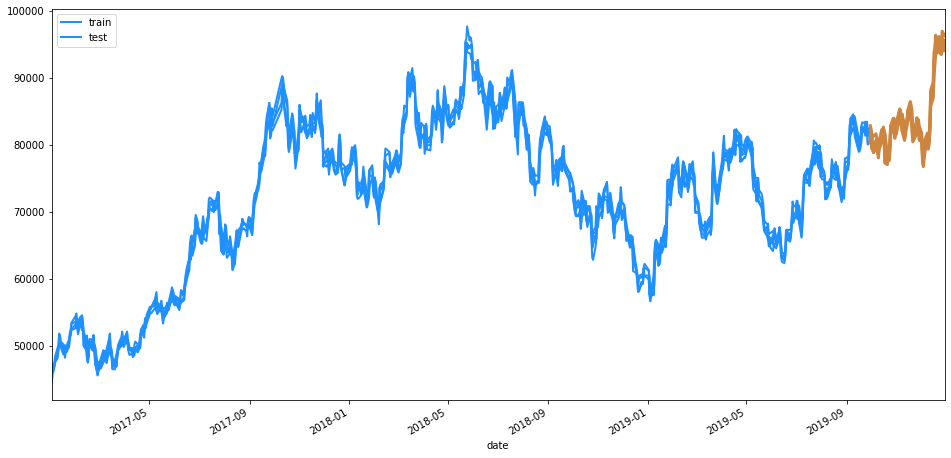

In [6]:
ax = train.plot(figsize=(16,8), color='dodgerblue', linewidth=2)
test.plot(ax=ax, color='peru', linewidth=3)
plt.legend(['train', 'test'])
plt.show()

# 7.Data MinMaxSacling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# 8. Transform to Pandas DataFrame

In [8]:
train_sc_df = pd.DataFrame(train_sc, columns=["open", "high", "low", "close"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["open", "high", "low", "close"], index=test.index)

# 9. train_sc_df

In [9]:
train_sc_df

,open,high,low,close
date,,,,
2017-01-02,0.000000,0.000000,0.000,0.000000
2017-01-03,0.028684,0.025145,0.032,0.029293
2017-01-04,0.044510,0.022244,0.032,0.014141
2017-01-05,0.044510,0.029014,0.045,0.023232
2017-01-06,0.058358,0.047389,0.060,0.044444
...,...,...,...,...
2019-09-24,0.746785,0.725338,0.736,0.759596
2019-09-25,0.740851,0.711799,0.738,0.729293
2019-09-26,0.756677,0.725338,0.758,0.757576


# 10. Setting for Sliding Window

In [10]:
# List
columns = ["open", "high", "low", "close"]

for col in columns : 
    for s in range(5, 17):
        train_sc_df['{} shift_-{}'.format(col,s)] = train_sc_df[col].shift(s)
        test_sc_df['{} shift_-{}'.format(col,s)] = test_sc_df[col].shift(s)
train_sc_df.head(18)

,open,high,low,close,open shift_-5,open shift_-6,open shift_-7,open shift_-8,open shift_-9,open shift_-10,...,close shift_-7,close shift_-8,close shift_-9,close shift_-10,close shift_-11,close shift_-12,close shift_-13,close shift_-14,close shift_-15,close shift_-16
date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.000000,0.000000,0.000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.028684,0.025145,0.032,0.029293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.044510,0.022244,0.032,0.014141,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.044510,0.029014,0.045,0.023232,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.058358,0.047389,0.060,0.044444,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.074184,0.072534,0.072,0.075758,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,0.100890,0.081238,0.092,0.079798,0.028684,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,0.103858,0.114120,0.108,0.117172,0.044510,0.028684,0.000000,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-12,0.135509,0.108317,0.116,0.096970,0.044510,0.044510,0.028684,0.000000,NaN,NaN,...,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 11. NaN Omit

In [11]:
X_train = train_sc_df.dropna().drop(["open", "high", "low", "close"], axis=1)
y_train = train_sc_df.dropna()[["open", "high", "low", "close"]]["close"]

In [12]:
X_test = test_sc_df.dropna().drop(["open", "high", "low", "close"], axis=1)
y_test = test_sc_df.dropna()[["open", "high", "low", "close"]]["close"]

# 12. Final Train & Test

In [13]:
X_train.head()

,open shift_-5,open shift_-6,open shift_-7,open shift_-8,open shift_-9,open shift_-10,open shift_-11,open shift_-12,open shift_-13,open shift_-14,...,close shift_-7,close shift_-8,close shift_-9,close shift_-10,close shift_-11,close shift_-12,close shift_-13,close shift_-14,close shift_-15,close shift_-16
date,,,,,,,,,,,,,,,,,,,,,
2017-01-24,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,0.058358,0.044510,0.044510,...,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000
2017-01-25,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,0.058358,0.044510,...,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293
2017-01-26,0.094955,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,0.058358,...,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141
2017-01-31,0.097923,0.094955,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,0.074184,...,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232
2017-02-01,0.102868,0.097923,0.094955,0.083086,0.090010,0.105836,0.100890,0.135509,0.103858,0.100890,...,0.076768,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444


In [14]:
X_train.columns

Index(['open shift_-5', 'open shift_-6', 'open shift_-7', 'open shift_-8',
       'open shift_-9', 'open shift_-10', 'open shift_-11', 'open shift_-12',
       'open shift_-13', 'open shift_-14', 'open shift_-15', 'open shift_-16',
       'high shift_-5', 'high shift_-6', 'high shift_-7', 'high shift_-8',
       'high shift_-9', 'high shift_-10', 'high shift_-11', 'high shift_-12',
       'high shift_-13', 'high shift_-14', 'high shift_-15', 'high shift_-16',
       'low shift_-5', 'low shift_-6', 'low shift_-7', 'low shift_-8',
       'low shift_-9', 'low shift_-10', 'low shift_-11', 'low shift_-12',
       'low shift_-13', 'low shift_-14', 'low shift_-15', 'low shift_-16',
       'close shift_-5', 'close shift_-6', 'close shift_-7', 'close shift_-8',
       'close shift_-9', 'close shift_-10', 'close shift_-11',
       'close shift_-12', 'close shift_-13', 'close shift_-14',
       'close shift_-15', 'close shift_-16'],
      dtype='object')

In [15]:
y_train.head()

date
2017-01-24    0.117172
2017-01-25    0.119192
2017-01-26    0.151515
2017-01-31    0.159596
2017-02-01    0.165657
Name: close, dtype: float64

In [16]:
X_test.head()

,open shift_-5,open shift_-6,open shift_-7,open shift_-8,open shift_-9,open shift_-10,open shift_-11,open shift_-12,open shift_-13,open shift_-14,...,close shift_-7,close shift_-8,close shift_-9,close shift_-10,close shift_-11,close shift_-12,close shift_-13,close shift_-14,close shift_-15,close shift_-16
date,,,,,,,,,,,,,,,,,,,,,
2019-10-24,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,0.711177,0.675569,0.728981,...,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808,0.731313,0.735354
2019-10-25,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,0.711177,0.675569,...,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808,0.731313
2019-10-28,0.653808,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,0.711177,...,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808
2019-10-29,0.675569,0.653808,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,0.705242,...,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970
2019-10-30,0.667656,0.675569,0.653808,0.727003,0.736894,0.744807,0.711177,0.736894,0.693373,0.675569,...,0.640404,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970


In [17]:
y_test.head()

date
2019-10-24    0.690909
2019-10-25    0.749495
2019-10-28    0.749495
2019-10-29    0.751515
2019-10-30    0.721212
Name: close, dtype: float64

# 13. ndarray to Tranform

In [18]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# 14. Final Training Set & Test Set's X

In [19]:
X_train_t = X_train.reshape(X_train.shape[0], 48, 1)
X_test_t = X_test.reshape(X_test.shape[0], 48, 1)

# 15. Seed Setting

In [20]:
from numpy.random import seed
seed(1234)
from tensorflow import set_random_seed
set_random_seed(1234)

# 16. LSTM Model

In [21]:
# Library
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation

import keras.backend.tensorflow_backend as K
with K.tf.device('/gpu:0'):
    # Sequeatial Model 
    K.clear_session() 
    model = Sequential()

    # 1층
    model.add(LSTM(2000, input_shape=(48,1), return_sequences=True)) # (timestep, feature) 
    model.add(Dropout(0.1))
    model.add(Dense(2000, activation = "relu"))

    # 2층
    model.add(LSTM(2000, return_sequences=True)) # (timestep, feature) 
    model.add(Dropout(0.1))
    model.add(Dense(2000, activation = "relu"))
    
    # 3층
    model.add(LSTM(2000)) # (timestep, feature) 
    model.add(Dense(1)) # output = 1 

    # 결과
    model.compile(loss='mean_squared_error', optimizer='adam') 
    model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 48, 2000)          16016000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 2000)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 48, 2000)          4002000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 48, 2000)          32008000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 2000)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 48, 2000)          4002000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 2000)              32008000  
__________

# 17. Model Fitting

In [22]:
import keras.backend.tensorflow_backend as K
with K.tf.device('/gpu:0'):
    early_stop = EarlyStopping(monitor='loss', patience=30, verbose=1)
    model.fit(X_train_t, y_train, epochs=150, batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/150
655/655 [==============================] - 549s 838ms/step - loss: 0.2361
Epoch 2/150
420/655 [==================>...........] - ETA: 3:00 - loss: 0.0145

KeyboardInterrupt: 

# 18. Train Prediction

In [ ]:
# Pred
y_pred = model.predict(X_train_t)
PRED = pd.DataFrame(y_pred)
PRED.columns = ["PRED"]

# Actual
REAL = pd.DataFrame(y_train)
REAL.columns = ["REAL"]

# Setting
RESULT = pd.concat([REAL,PRED], axis=1)
RESULT["date"] = train.index[16:]

# Set Index
RESULT = RESULT.set_index("date")

# Pred
y_pred = model.predict(X_train_t)
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'], index=train.index[16:])

# True
y_train_df = pd.DataFrame(y_train, columns=['actual_price'], index=train.index[16:])

# plotting the results
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')
plt.plot(y_pred_df["prediction"], color = 'blue', label = 'Predicted Stock Price', linewidth = 3)
plt.plot(y_train_df["actual_price"], color = 'red', label = 'Actual Stock Price', linewidth = 3)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 19. Test Prediction

In [ ]:
# Pred
y_pred = model.predict(X_test_t)
PRED = pd.DataFrame(y_pred)
PRED.columns = ["PRED"]

# Actual
REAL = pd.DataFrame(y_test)
REAL.columns = ["REAL"]

RESULT_TEST = pd.concat([REAL,PRED], axis=1)
RESULT_TEST["date"] = test.index[16:]

RESULT_TEST = RESULT_TEST.set_index("date")

y_pred = model.predict(X_test_t)
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'], index=test.index[16:])

y_test_df = pd.DataFrame(y_test, columns=['actual_price'], index=test.index[16:])

# plotting the results
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')
plt.plot(y_pred_df["prediction"], color = 'blue', label = 'Predicted Stock Price', linewidth = 3)
plt.plot(y_test_df["actual_price"], color = 'red', label = 'Actual Stock Price', linewidth = 3)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 20. Test RMSE

In [ ]:
forecast_error = y_test.reshape(-1,1) - y_pred
SS, RMSE = 0, 0
for i in forecast_error : 
    SS = SS + i * i
    RMSE = SS / len(forecast_error)
print("Test DataSet's RMSE : {}" .format(float(RMSE**0.5)))